# NYC Taxi Data Analysis

In this notebook, we will analyze the taxi data of New York City to gain insights into the travel patterns and traffic conditions in different areas and time periods. The dataset used is the Yellow Taxi Trip Records (Data Source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page). We will also make use of the NYC taxi zones shapefile for visualizations.

The main objectives of this analysis are:

1. Load and preprocess the taxi trip records data.
2. Explore the data to understand the distribution of trip distances, durations, and speeds.
3. Analyze the traffic patterns and conditions across different zones and time periods.
4. Visualize the traffic conditions on a map.

Let's start by importing the necessary libraries and loading the data.


In [1]:
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\arrie\Documents\Lyft')

# Load Yellow Taxi Trip Records data (Start with a small data)
data = pd.read_parquet(r'data\yellow_tripdata_2019-01.parquet', engine='pyarrow')

# Read the taxi zones shapefile
taxi_zones = gpd.read_file(r'data\taxi_zones.shp')


## Overview of Yellow Taxi Trip Records Data

Let's take a look at the first few rows of the data and get a quick overview of the DataFrame.


In [2]:
# Print the first few rows of Yellow Taxi Trip Records data
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.5,1.0,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.6,1.0,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.0,1.0,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.0,1.0,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.0,2.0,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,None


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7696617 entries, 0 to 7696616
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airpor

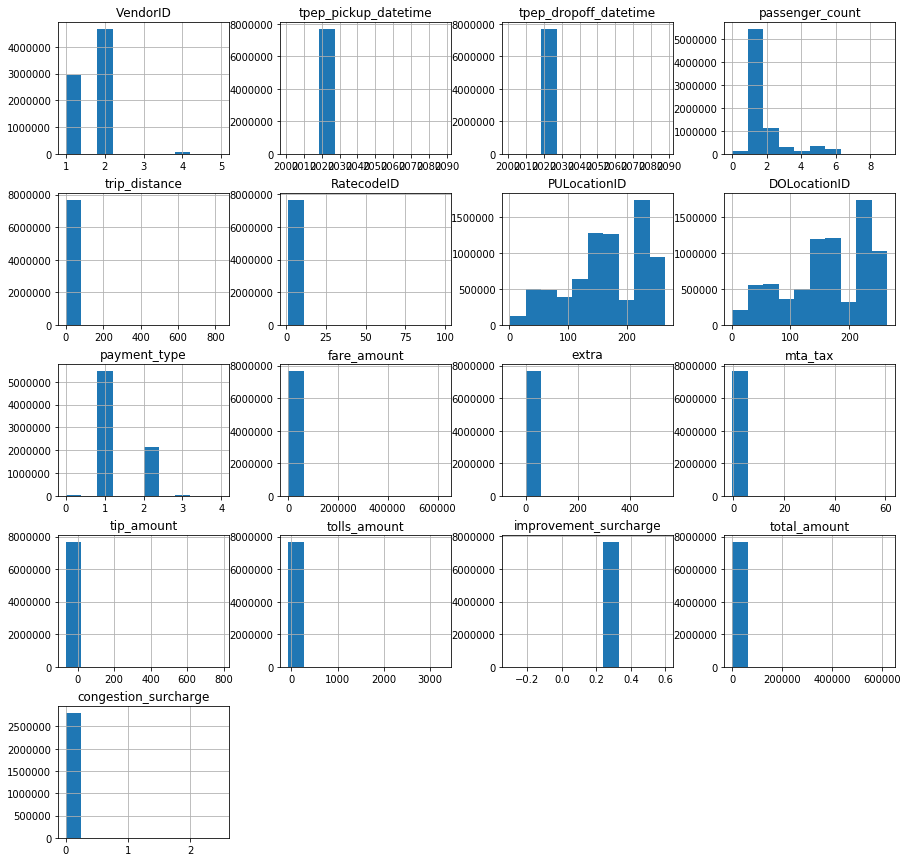


Categorical Value Counts:
Value counts for store_and_fwd_flag:
N    7630295
Y      37650
Name: store_and_fwd_flag, dtype: int64

Value counts for airport_fee:
Series([], Name: airport_fee, dtype: int64)



In [3]:
# Write a function to get a quick overview of a dataframe
def dataframe_overview(dataframe,var_list):
    df = dataframe[var_list].copy()
    if len(var_list) > 1:
        print("DataFrame Info:")
        print(df.info())
    print("\nDataFrame Description:")
    print(df.describe())
    print("\nUnique Values:")
    print(df.nunique())
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Plot histograms
    print("\nHistograms:")
    df.hist(figsize=(15, 15))
    plt.show()

    # Categorical value counts
    print("\nCategorical Value Counts:")
    for col in df.select_dtypes(include='object').columns:
        print(f'Value counts for {col}:')
        print(df[col].value_counts())
        print()

        
# Overview of Yellow Taxi Trip Records data
dataframe_overview(data, list(data))        

## Visualizing the NYC Taxi Zones

Next, we'll plot the taxi zones on a map to understand the geographical distribution of the zones.


C:\Users\arrie\Anaconda3\envs\SparkCourse\lib\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


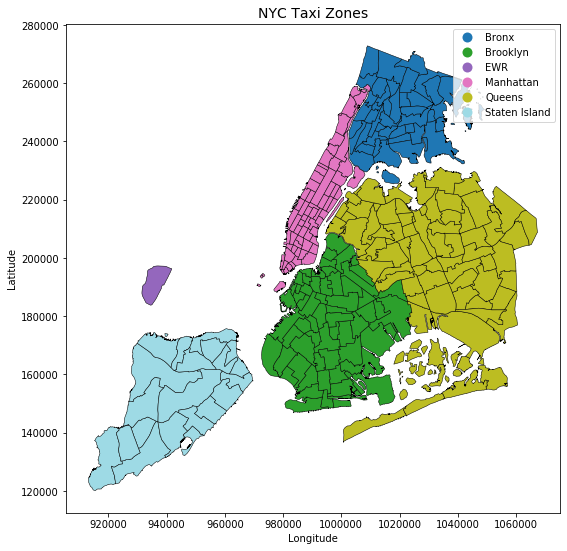

In [4]:
# Plot the taxi zones
fig, ax = plt.subplots(figsize=(9, 9))
taxi_zones.plot(ax=ax, column="borough", legend=True, cmap="tab20", edgecolor="black", linewidth=0.5)

# Set the title and axis labels
ax.set_title("NYC Taxi Zones", fontsize=14)
ax.set_xlabel("Longitude", fontsize=10)
ax.set_ylabel("Latitude", fontsize=10)

# Show the plot
plt.show()


## Overview of taxi zones

Let's next take a look at the first few rows of the taxi zone data and get a quick overview of it.


In [5]:
taxi_zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.770 256767.698, 1026495.593 ..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.310 144283.336, 936046.565 14..."


DataFrame Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int64   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int64   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(2)
memory usage: 14.5+ KB
None

DataFrame Description:
         OBJECTID  Shape_Leng  Shape_Area  LocationID
count  263.000000  263.000000  263.000000  263.000000
mean   132.000000    0.094269    0.000402  131.984791
std     76.065761    0.054594    0.000482   76.073787
min      1.000000    0.014306    0.000006    1.000000
25%     66.500000    0.054722    0.000133   66.500000
50%    132.000000    0.084341    0.000268  132.000000
75%    197.

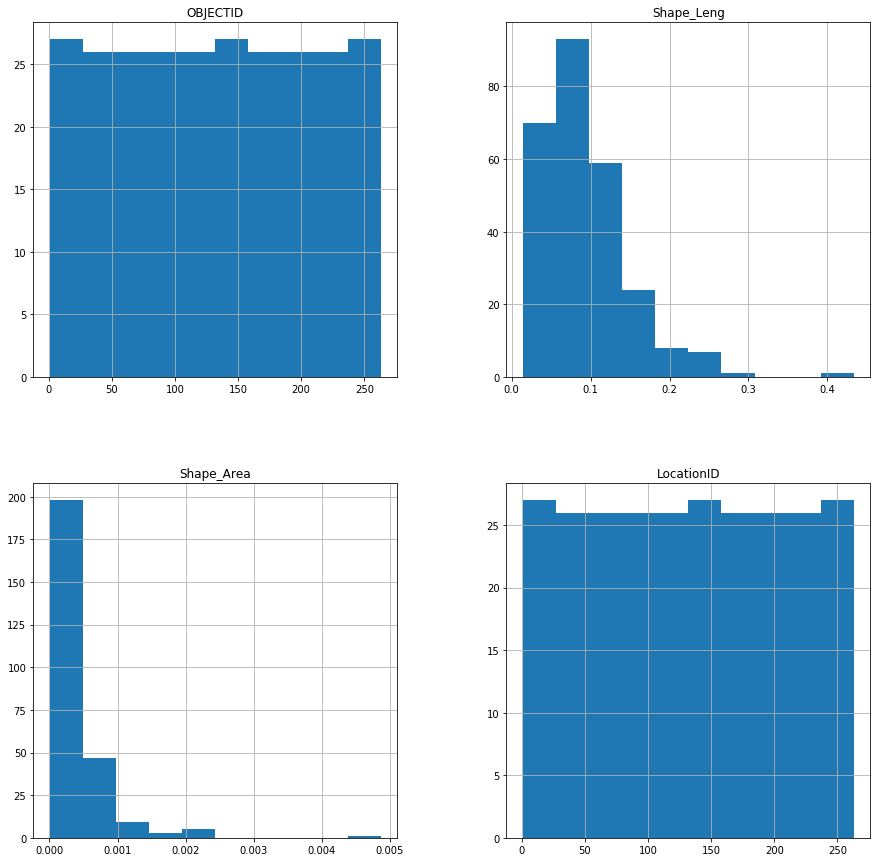


Categorical Value Counts:
Value counts for zone:
Governor's Island/Ellis Island/Liberty Island    3
Corona                                           2
Newark Airport                                   1
Oakwood                                          1
Park Slope                                       1
                                                ..
Fordham South                                    1
Forest Hills                                     1
Forest Park/Highland Park                        1
Fort Greene                                      1
Yorkville West                                   1
Name: zone, Length: 260, dtype: int64

Value counts for borough:
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Name: borough, dtype: int64



In [6]:
# Overview of taxi zones
dataframe_overview(taxi_zones, list(taxi_zones))

#### Investigate duplicated LocationID in taxi_zones

In [7]:
# Check relationship between OBJECTID and LocationID
print('OBJECTID equals LocationID except: \n')
print(taxi_zones[['OBJECTID','LocationID','geometry']][taxi_zones['OBJECTID'] != taxi_zones['LocationID']])

# From overview above, we also noticed duplicates in LocationID, let's find out
print('\nDuplicated LocationID: \n')
print(taxi_zones[['OBJECTID','LocationID','geometry']][taxi_zones.duplicated(['LocationID'], keep=False)])

OBJECTID equals LocationID except: 

     OBJECTID  LocationID                                           geometry
56         57          56  POLYGON ((1025447.751 212499.788, 1024585.351 ...
103       104         103  POLYGON ((973172.666 194632.348, 973310.630 19...
104       105         103  POLYGON ((979605.759 191880.575, 979978.435 19...

Duplicated LocationID: 

     OBJECTID  LocationID                                           geometry
55         56          56  POLYGON ((1024813.399 211643.796, 1024910.997 ...
56         57          56  POLYGON ((1025447.751 212499.788, 1024585.351 ...
102       103         103  POLYGON ((972079.575 190732.429, 972184.766 19...
103       104         103  POLYGON ((973172.666 194632.348, 973310.630 19...
104       105         103  POLYGON ((979605.759 191880.575, 979978.435 19...


In [8]:
# Check whether taxi data have location ID below
print("Does taxi data have these loc ID: 57, 104, 105?")
data[data.PULocationID.isin([57, 104, 105]) | data.DOLocationID.isin([57, 104, 105])]

Does taxi data have these loc ID: 57, 104, 105?


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2976,2,2019-01-01 00:45:34,2019-01-01 01:04:16,1.0,10.89,1.0,N,132,57,2,31.00,0.50,0.5,0.00,0.00,0.3,32.30,NaN,None
24054,2,2019-01-01 01:37:40,2019-01-01 01:55:21,1.0,10.11,1.0,N,132,57,2,28.50,0.50,0.5,0.00,0.00,0.3,29.80,NaN,None
28893,2,2019-01-01 02:56:58,2019-01-01 03:20:58,2.0,2.51,1.0,N,260,57,2,15.50,0.50,0.5,0.00,0.00,0.3,16.80,NaN,None
53950,1,2019-01-01 04:03:14,2019-01-01 04:16:41,2.0,2.20,1.0,N,129,57,2,10.50,0.50,0.5,0.00,0.00,0.3,11.80,NaN,None
53951,1,2019-01-01 04:18:02,2019-01-01 04:22:46,1.0,0.70,1.0,N,57,56,2,4.50,0.50,0.5,0.00,0.00,0.3,5.80,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7543130,2,2019-01-31 16:20:04,2019-01-31 16:35:18,3.0,1.84,1.0,N,138,57,1,11.50,1.00,0.5,2.66,0.00,0.3,15.96,0.0,None
7659577,1,2019-01-31 23:55:16,2019-02-01 00:06:36,1.0,2.60,1.0,N,138,57,2,10.50,0.50,0.5,0.00,0.00,0.3,11.80,0.0,None
7663228,2,2019-01-31 23:50:33,2019-02-01 00:19:44,6.0,5.34,1.0,N,138,57,2,23.50,0.50,0.5,0.00,0.00,0.3,24.80,0.0,None
7686685,2,2019-01-22 08:41:00,2019-01-22 09:36:00,NaN,9.87,NaN,None,57,161,0,39.89,2.75,0.5,0.00,5.76,0.3,49.20,NaN,None


after checking taxi+_zone_lookup.csv from the source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

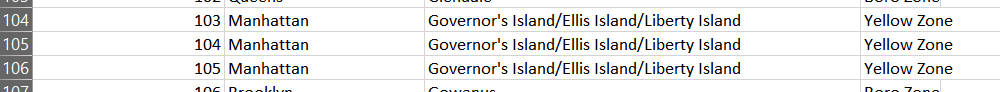

I will be using OBJECTID, which has unique values, as the key for joining tables later.

### Add feature: 
- trip duration

In [9]:
df = data.copy()

# Calculate trip duration in minutes
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'])\
                        .dt.total_seconds() / 60

### Clean data: 
- voided trips
- too short trip duration
- too short trip distance

In [10]:
# Set filtering condition

# Minimum trip duration in minutes
min_trip_duration = 3 

# Minimum trip distance in mile(s)
min_trip_distance = 0.5

In [11]:
# Create a function to filter data and print outcome
def filter_where(df, condition):
    len_before = df.shape[0]
    df = df[condition]
    len_after = df.shape[0]
    removed_count = len_before - len_after
    removed_percent = removed_count/data.shape[0]
    print('    {} ({:.1%}) data removed'.format(removed_count,removed_percent))
    return df

In [12]:
# Filter completed trip
print('\nFilter data with completed trips:')
df = filter_where(df, df['payment_type'] != 6)  # referenced document: data_dictionary_trip_records_yellow.pdf

# Filter data on trip duration
print('\nFilter data with trip duration > {} minutes:'.format(min_trip_duration))
df = filter_where(df, df['trip_duration'] > min_trip_duration)


# Filter data on trip distance
print('\nFilter data with trip distance > {} mile(s):'.format(min_trip_distance))
df = filter_where(df, df['trip_distance'] > min_trip_distance)


Filter data with completed trips:
    0 (0.0%) data removed

Filter data with trip duration > 3 minutes:
    461094 (6.0%) data removed

Filter data with trip distance > 0.5 mile(s):
    253750 (3.3%) data removed


### Add feature: 
- average miles per hour

### Clean data:
- trips with unreasonably high speed

In [13]:
# Calculate average miles per hour of each trip
df['avg_mph'] = df['trip_distance']/(df['trip_duration']/60)

# Filter reasonable mph (Note: New York's speed limit has been set at 65 mph since 1995)
print('\nFilter data with reasonable speed')
df = filter_where(df, df['avg_mph'] <= 80)



Filter data with reasonable speed
    110 (0.0%) data removed


### Distribution of trip_duration

Distribution of trip_duration:



count    6.981663e+06
mean     1.780551e+01
std      7.751757e+01
min      3.016667e+00
25%      7.100000e+00
50%      1.108333e+01
75%      1.756667e+01
max      4.364802e+04
Name: trip_duration, dtype: float64

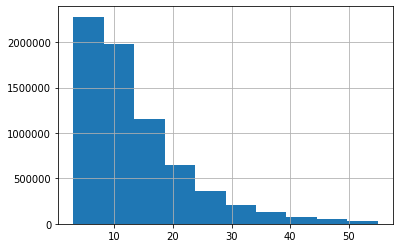

In [14]:
print('Distribution of trip_duration:\n')
# limit the range at 99th percentile for better visulization
df['trip_duration'].hist(range=(df['trip_duration'].min(), df['trip_duration'].quantile(0.99)))
df['trip_duration'].describe()

### Distribution of trip_distance

Distribution of trip_distance:



count    6.981663e+06
mean     3.072414e+00
std      3.850305e+00
min      5.100000e-01
25%      1.080000e+00
50%      1.700000e+00
75%      3.100000e+00
max      2.140100e+02
Name: trip_distance, dtype: float64

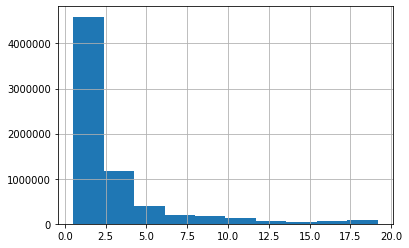

In [15]:
print('Distribution of trip_distance:\n')
df['trip_distance'].hist(range=(df['trip_distance'].min(), df['trip_distance'].quantile(0.99)))
df['trip_distance'].describe()

### Distribution of avg_mph

Distribution of avg_mph:

AxesSubplot(0.125,0.125;0.775x0.755)
count    6.981663e+06
mean     1.181607e+01
std      6.405274e+00
min      1.649559e-03
25%      7.761039e+00
50%      1.018868e+01
75%      1.377990e+01
max      7.948905e+01
Name: avg_mph, dtype: float64


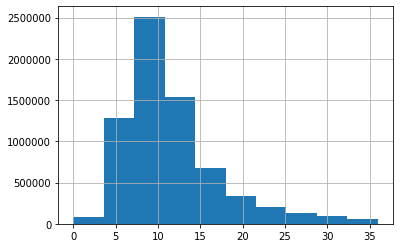

In [16]:
print('Distribution of avg_mph:\n')
print(df['avg_mph'].hist(range=(df['avg_mph'].min(), df['avg_mph'].quantile(0.99))))
print(df['avg_mph'].describe())

## Visualizing traffic in NYC Taxi Zones by period

Next, we'll plot the taxi zones on a map to understand the traffic distribution by different time period.

Let's started by assigning time period categories.

In [ ]:
# Assign time period
def assign_time_period(hour):
    if 6 <= hour < 10:
        return 'AM Peak'
    elif 10 <= hour < 16:
        return 'Midday'
    elif 16 <= hour < 19:
        return 'PM Peak'
    elif 19 <= hour < 24:
        return 'Evening'
    else:
        return 'Early Morning'

print('This step will take some time...')

# Map period
df['PU_period'] = df['tpep_pickup_datetime'].apply(lambda x: assign_time_period(x.hour))
df['DO_period'] = df['tpep_dropoff_datetime'].apply(lambda x: assign_time_period(x.hour))
print(df[['PU_period','DO_period']])

This step will take some time...


In taxi data, the locationID and period information might differ by pickup and dropoff.

Therefore, I will calculate average mph grouped by location and period for pickup and dropoff respectively, then take the average.

In [ ]:
# Calculate average mph by location and period for pickup
PU_mph_grp = df.groupby(by=['PULocationID', 'PU_period']).agg({'avg_mph':'mean'}).reset_index()
PU_mph_grp.columns = ['LocationID', 'period', 'avg_mph']

# Calculate average mph by location and period for dropoff
DO_mph_grp = df.groupby(by=['DOLocationID', 'DO_period']).agg({'avg_mph':'mean'}).reset_index()
DO_mph_grp.columns = ['LocationID', 'period', 'avg_mph']

# Combine and take the average 
concat_mph_grp = pd.concat([PU_mph_grp, DO_mph_grp])
avg_mph_grp = concat_mph_grp.groupby(by=['LocationID', 'period']).agg({'avg_mph':'mean'}).reset_index()

In [ ]:
mph_pctl_25 = avg_mph_grp['avg_mph'].describe()['25%']
mph_pctl_50 = avg_mph_grp['avg_mph'].describe()['50%']
mph_pctl_75 = avg_mph_grp['avg_mph'].describe()['75%']

# Define a function to assign speed categories based on mph
def assign_speed(mph):
    if 0 <= mph < mph_pctl_25:
        return 'Crawling'
    elif mph_pctl_25 <= mph < mph_pctl_50:
        return 'Slow-moving'
    elif mph_pctl_50 <= mph < mph_pctl_75:
        return 'Moderate'
    else:
        return 'Smooth'

# Assign speed categories
avg_mph_grp['speed'] = avg_mph_grp['avg_mph'].apply(lambda x: assign_speed(x))

# convert to pivot table format so we can merge with taxi zone data later
avg_mph_df = avg_mph_grp.pivot(index='LocationID', columns='period', values='speed').reset_index()
avg_mph_df.columns.name = None # Rename the columns
avg_mph_df

In [ ]:
# Rename LocationID in avg_mph_df
avg_mph_df = avg_mph_df.rename(columns={'LocationID': 'OBJECTID'})

# Add speed categories info to taxi_zones
taxi_zones_speed = taxi_zones.merge(avg_mph_df, on='OBJECTID', indicator=True, how='left')
print("\ntaxi_zones_speed:\n")
taxi_zones_speed.head()

# Check for any missing match
# print('\nAny missing match? \n', taxi_zones_speed[taxi_zones_speed._merge != 'both'])


In [ ]:
# Create the custom color map for speed categories
speed_colors = {
    'Crawling': 'red',   
    'Slow-moving': 'orange',  
    'Moderate': 'yellow',
    'Smooth': 'green',
    float('nan'): 'gray'     
}

# Create plot function to visualize traffic by time period
def plot_taxi_zones_traffic(period):

    # Replace the speed categories with corresponding colors in the DataFrame
    taxi_zones_speed['speed_colors'] = taxi_zones_speed[period].map(speed_colors)
    
    # Plot the taxi zones
    fig, ax = plt.subplots(figsize=(8, 8))
    taxi_zones_speed.plot(ax=ax, color=taxi_zones_speed['speed_colors'], legend=True, edgecolor="black", linewidth=0.5)
    
    # Set the title and axis labels
    ax.set_title(f"NYC Taxi Zones Traffic during {period}", fontsize=16)
    ax.set_xlabel("Longitude", fontsize=10)
    ax.set_ylabel("Latitude", fontsize=10)
    
    # Show the plot
    plt.show()

plot_taxi_zones_traffic('AM Peak')
plot_taxi_zones_traffic('Midday')
plot_taxi_zones_traffic('PM Peak')
plot_taxi_zones_traffic('Evening')
plot_taxi_zones_traffic('Early Morning')